# Analyze ParaRel data queries

In [1]:
import json
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import os
import math

In [2]:
query_file = "/cephyr/users/lovhag/Alvis/projects/rome/data/P19_gpt2_xl_preds.jsonl"

## Load the queries

In [3]:
queries = pd.DataFrame()
with open(query_file) as f:
    for line in f:
        queries = queries.append(json.loads(line), ignore_index=True)
        
queries.head()

,attribute,candidate_p,candidate_prediction,candidate_rank,gold_p,gold_rank,known_id,prediction,prediction_p,prompt,relation_id,subject,template,top10_tokens,top10_tokens_probs
0,Alexandra,0.024580,London,2.0,0.000011,3197.0,0.0,New,0.038592,Allan Peiper was born in,P19,Allan Peiper,{} was born in,"[ New, the, London, 18, Toronto, Montreal...","[0.03859247639775276, 0.03803418204188347, 0.0..."
1,Alexandra,0.029013,Canada,2.0,0.000011,3354.0,1.0,the,0.077758,Allan Peiper is originally from,P19,Allan Peiper,{} is originally from,"[ New, the, London, 18, Toronto, Montreal...","[0.04142675921320915, 0.07775774598121643, 0.0..."
2,Alexandra,0.023173,Canada,2.0,0.000013,3389.0,2.0,the,0.079163,Allan Peiper was originally from,P19,Allan Peiper,{} was originally from,"[ New, the, London, 18, Toronto, Montreal...","[0.03634488210082054, 0.07916285842657089, 0.0..."
3,Alexandra,0.035623,Canada,2.0,0.000005,4780.0,3.0,the,0.154659,Allan Peiper is native to,P19,Allan Peiper,{} is native to,"[ New, the, London, 18, Toronto, Montreal...","[0.03823259472846985, 0.15465885400772095, 0.0..."
4,Alexandra,0.032304,Canada,1.0,0.000007,4640.0,4.0,the,0.132673,Allan Peiper was native to,P19,Allan Peiper,{} was native to,"[ New, the, London, 18, Toronto, Montreal...","[0.029023099690675735, 0.13267268240451813, 0...."


In [37]:
queries

,attribute,candidate_p,candidate_prediction,candidate_rank,gold_p,gold_rank,known_id,prediction,prediction_p,prompt,relation_id,subject,template,top10_tokens,top10_tokens_probs
0,Alexandra,0.024580,London,2.0,0.000011,3197.0,0.0,New,0.038592,Allan Peiper was born in,P19,Allan Peiper,{} was born in,"[ New, the, London, 18, Toronto, Montreal...","[0.03859247639775276, 0.03803418204188347, 0.0..."
1,Alexandra,0.029013,Canada,2.0,0.000011,3354.0,1.0,the,0.077758,Allan Peiper is originally from,P19,Allan Peiper,{} is originally from,"[ New, the, London, 18, Toronto, Montreal...","[0.04142675921320915, 0.07775774598121643, 0.0..."
2,Alexandra,0.023173,Canada,2.0,0.000013,3389.0,2.0,the,0.079163,Allan Peiper was originally from,P19,Allan Peiper,{} was originally from,"[ New, the, London, 18, Toronto, Montreal...","[0.03634488210082054, 0.07916285842657089, 0.0..."
3,Alexandra,0.035623,Canada,2.0,0.000005,4780.0,3.0,the,0.154659,Allan Peiper is native to,P19,Allan Peiper,{} is native to,"[ New, the, London, 18, Toronto, Montreal...","[0.03823259472846985, 0.15465885400772095, 0.0..."
4,Alexandra,0.032304,Canada,1.0,0.000007,4640.0,4.0,the,0.132673,Allan Peiper was native to,P19,Allan Peiper,{} was native to,"[ New, the, London, 18, Toronto, Montreal...","[0.029023099690675735, 0.13267268240451813, 0...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5448,Lisbon,0.029672,Lisbon,5.0,0.029672,5.0,5448.0,Brazil,0.185047,Lopo Soares de Albergaria was originally from,P19,Lopo Soares de Albergaria,{} was originally from,"[ the, Rio, Lisbon, Brazil, Portugal, 18,...","[0.13050571084022522, 0.045875560492277145, 0...."
5449,Lisbon,0.006318,India,14.0,0.001807,43.0,5449.0,the,0.279657,Lopo Soares de Albergaria is native to,P19,Lopo Soares de Albergaria,{} is native to,"[ the, Rio, Lisbon, Brazil, Portugal, 18,...","[0.27965664863586426, 0.0147432005032897, 0.00..."
5450,Lisbon,0.006409,Lisbon,15.0,0.006409,15.0,5450.0,the,0.228632,Lopo Soares de Albergaria was native to,P19,Lopo Soares de Albergaria,{} was native to,"[ the, Rio, Lisbon, Brazil, Portugal, 18,...","[0.22863218188285828, 0.025591539219021797, 0...."
5451,Lisbon,0.015554,Lisbon,5.0,0.015554,5.0,5451.0,the,0.255245,Lopo Soares de Albergaria originated from,P19,Lopo Soares de Albergaria,{} originated from,"[ the, Rio, Lisbon, Brazil, Portugal, 18,...","[0.2552448809146881, 0.009845842607319355, 0.0..."


### Is the cumulative probability assigned to the top 10 tokens (for the LAMA prompt) large for all paraphrases?

Generally, yes. The mean is 1.235 of the cumulative prob assigned using the original LAMA template. The lowest value is 0.286 of the probability assigned with the original LAMA template. Seemingly, the cumulative probability is lower when the model interprets one query to ask for a year, and not a country (e.g. "X was born in"). 

In [25]:
cum_probs = queries.apply(lambda row: sum(row.top10_tokens_probs)/sum(queries[(queries.subject==row.subject) & (queries.template=="{} was born in")].top10_tokens_probs.iloc[0]), axis=1)
cum_probs

0       1.000000
1       1.022963
2       0.965687
3       1.225681
4       1.089346
          ...   
5448    1.515013
5449    1.518104
5450    1.428349
5451    1.339539
5452    1.447803
Length: 5453, dtype: float64

In [36]:
cum_probs.mean()

1.2352393131802317

In [28]:
cum_probs.min()

0.28598140942955

In [26]:
cum_probs.argmin()

2381

In [27]:
queries[queries.subject==queries.loc[2381].subject]

,attribute,candidate_p,candidate_prediction,candidate_rank,gold_p,gold_rank,known_id,prediction,prediction_p,prompt,relation_id,subject,template,top10_tokens,top10_tokens_probs
2380,Helsinki,0.015356,Vienna,6.0,0.001028,105.0,2380.0,17,0.115959,Aino Sibelius was born in,P19,Aino Sibelius,{} was born in,"[ 17, 18, the, 16, 15, 14, Vienna, Ista...","[0.11595944315195084, 0.11106570810079575, 0.0..."
2381,Helsinki,0.025674,Istanbul,3.0,0.004635,38.0,2381.0,the,0.095744,Aino Sibelius is originally from,P19,Aino Sibelius,{} is originally from,"[ 17, 18, the, 16, 15, 14, Vienna, Ista...","[3.530766116455197e-05, 7.188975723693147e-05,..."
2382,Helsinki,0.022483,Italy,2.0,0.002659,64.0,2382.0,the,0.134363,Aino Sibelius was originally from,P19,Aino Sibelius,{} was originally from,"[ 17, 18, the, 16, 15, 14, Vienna, Ista...","[0.00012828639592044055, 0.0002816749620251357..."
2383,Helsinki,0.032327,Italy,3.0,0.001596,88.0,2383.0,the,0.224901,Aino Sibelius is native to,P19,Aino Sibelius,{} is native to,"[ 17, 18, the, 16, 15, 14, Vienna, Ista...","[0.00028152644517831504, 0.0003275920462328940..."
2384,Helsinki,0.019348,Istanbul,2.0,0.001354,110.0,2384.0,the,0.240536,Aino Sibelius was native to,P19,Aino Sibelius,{} was native to,"[ 17, 18, the, 16, 15, 14, Vienna, Ista...","[0.0007045995444059372, 0.0007021629135124385,..."
2385,Helsinki,0.022534,Italy,3.0,0.000578,163.0,2385.0,the,0.305582,Aino Sibelius originated from,P19,Aino Sibelius,{} originated from,"[ 17, 18, the, 16, 15, 14, Vienna, Ista...","[0.0034379258286207914, 0.003121709916740656, ..."
2386,Helsinki,0.020334,Italy,3.0,0.000707,130.0,2386.0,the,0.338191,Aino Sibelius originates from,P19,Aino Sibelius,{} originates from,"[ 17, 18, the, 16, 15, 14, Vienna, Ista...","[0.004709573928266764, 0.004079053178429604, 0..."


## Can the top candidate token be found in the top 10 tokens?

Most times, 4000 out of approx 5500.

<AxesSubplot:ylabel='Count'>

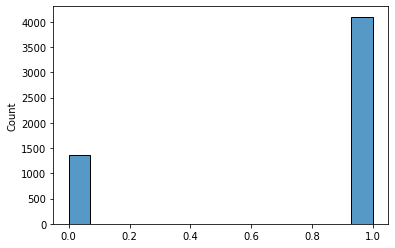

In [34]:
top_candidate_token_in_top10 = queries.apply(lambda row: row.candidate_prediction in row.top10_tokens, axis=1)
sns.histplot(data=top_candidate_token_in_top10, )

In [35]:
queries[~top_candidate_token_in_top10]

,attribute,candidate_p,candidate_prediction,candidate_rank,gold_p,gold_rank,known_id,prediction,prediction_p,prompt,relation_id,subject,template,top10_tokens,top10_tokens_probs
1,Alexandra,0.029013,Canada,2.0,0.000011,3354.0,1.0,the,0.077758,Allan Peiper is originally from,P19,Allan Peiper,{} is originally from,"[ New, the, London, 18, Toronto, Montreal...","[0.04142675921320915, 0.07775774598121643, 0.0..."
2,Alexandra,0.023173,Canada,2.0,0.000013,3389.0,2.0,the,0.079163,Allan Peiper was originally from,P19,Allan Peiper,{} was originally from,"[ New, the, London, 18, Toronto, Montreal...","[0.03634488210082054, 0.07916285842657089, 0.0..."
3,Alexandra,0.035623,Canada,2.0,0.000005,4780.0,3.0,the,0.154659,Allan Peiper is native to,P19,Allan Peiper,{} is native to,"[ New, the, London, 18, Toronto, Montreal...","[0.03823259472846985, 0.15465885400772095, 0.0..."
4,Alexandra,0.032304,Canada,1.0,0.000007,4640.0,4.0,the,0.132673,Allan Peiper was native to,P19,Allan Peiper,{} was native to,"[ New, the, London, 18, Toronto, Montreal...","[0.029023099690675735, 0.13267268240451813, 0...."
5,Alexandra,0.017533,Canada,3.0,0.000007,6281.0,5.0,the,0.211143,Allan Peiper originated from,P19,Allan Peiper,{} originated from,"[ New, the, London, 18, Toronto, Montreal...","[0.018596356734633446, 0.2111426442861557, 0.0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5435,Constantinople,0.007975,France,7.0,0.000426,208.0,5435.0,the,0.380108,Theodore the Studite is native to,P19,Theodore the Studite,{} is native to,"[ the, 16, 15, 17, 14, a, Rome, 12, 13...","[0.3801080584526062, 0.00013571955787483603, 8..."
5436,Constantinople,0.014666,Italy,1.0,0.002926,39.0,5436.0,the,0.310733,Theodore the Studite was native to,P19,Theodore the Studite,{} was native to,"[ the, 16, 15, 17, 14, a, Rome, 12, 13...","[0.31073251366615295, 0.00021897703118156642, ..."
5437,Constantinople,0.004264,Italy,11.0,0.000986,53.0,5437.0,the,0.399262,Theodore the Studite originated from,P19,Theodore the Studite,{} originated from,"[ the, 16, 15, 17, 14, a, Rome, 12, 13...","[0.39926207065582275, 0.00039418827509507537, ..."
5438,Constantinople,0.005619,Italy,8.0,0.001020,64.0,5438.0,the,0.407150,Theodore the Studite originates from,P19,Theodore the Studite,{} originates from,"[ the, 16, 15, 17, 14, a, Rome, 12, 13...","[0.4071500599384308, 0.0005955870728939772, 0...."
